In [175]:
import numpy as np
import os
from PIL import Image
import cv2

In [178]:
save_dir = '/home/alex/poker/done/'

In [209]:
cut = []
for element in os.listdir(save_dir):
    cut += [element]

In [210]:
cut[0]

'image0000001053.jpg4.jpg'

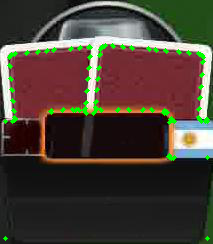

In [292]:
test = Image.open(save_dir+cut[3])
a = get_maximum_uniform_contour(np.asarray(test),8, margin = 5)
Image.fromarray(cv2.drawContours(np.asarray(test), a[0], -1, (0,255,0), 3))

In [291]:
def get_maximum_black_contour(image, fontsize, margin=0):
    """Get the largest possible contour of light or
    dark area in an image.
    Args:
        image: Image as numpy array! The image in which to find a contiguous area.
        fontsize: The fontsize for text. Will be used for blurring
            and for determining useful areas.
        margin: The minimum margin required around the image.
    Returns:
        A (contour, isDark) tuple. If no contour is found, both
        entries will be None.
    """
    if margin > 0:
        image = image[margin:-margin, margin:-margin]
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    black = np.where(gray<34,gray,255)  
    
    blurred = cv2.blur(src=black, ksize=(fontsize // 2, fontsize // 2))
    _, threshold = cv2.threshold(src=blurred, thresh=255 / 2, maxval=255, type=cv2.THRESH_BINARY)
    
    contoursDark = cv2.findContours(255 - threshold,
                                    mode=cv2.RETR_TREE,
                                    method=cv2.CHAIN_APPROX_SIMPLE)[-2]
 
    areasDark = list(map(cv2.contourArea, contoursDark))
    contour = contoursDark[np.argmax(areasDark)]
    isDark = True

    return contour, isDark


In [480]:
fontsize = 220
image = np.asarray(Image.open(save_dir+cut[5]))
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
img2 = np.where(gray<34,gray,255)   
blurred = cv2.blur(src=img2, ksize=(fontsize // 2, fontsize // 2))
_, threshold = cv2.threshold(src=blurred, thresh=255 / 2, maxval=255, type=cv2.THRESH_BINARY)
    
contoursDark = cv2.findContours(255 - threshold,
                                    mode=cv2.RETR_TREE,
                                    method=cv2.CHAIN_APPROX_SIMPLE)[-2]

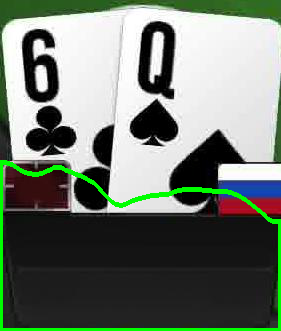

In [481]:
Image.fromarray(cv2.drawContours(np.asarray(image), contoursDark, -3, (0,255,0), 3))

In [482]:
def black_contour(image_file, fontsize):
  
    image = np.asarray(Image.open(image_file))
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    img2 = np.where(gray<34,gray,255)   
    blurred = cv2.blur(src=img2, ksize=(fontsize // 2, fontsize // 2))
    _, threshold = cv2.threshold(src=blurred, thresh=255 / 2, maxval=255, type=cv2.THRESH_BINARY)
    
    contoursDark = cv2.findContours(255 - threshold,
                                    mode=cv2.RETR_TREE,
                                    method=cv2.CHAIN_APPROX_SIMPLE)[-2]
    
    return Image.fromarray(cv2.drawContours(np.asarray(image), contoursDark, -3, (0,255,0), 3))

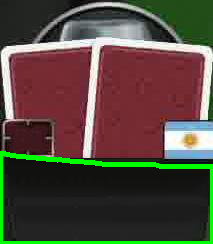

In [483]:
black_contour(save_dir+cut[0], 220)

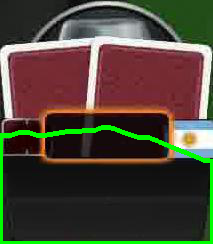

In [484]:
black_contour(save_dir+cut[3], 220)

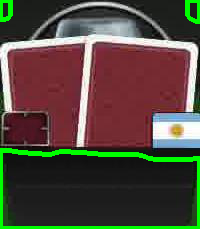

In [485]:
black_contour(save_dir+cut[8], 220)

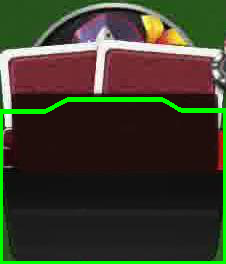

In [486]:
black_contour(save_dir+cut[10], 220)

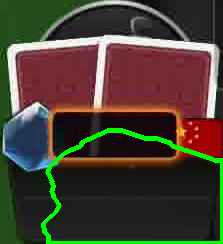

In [487]:
black_contour(save_dir+cut[15], 220)

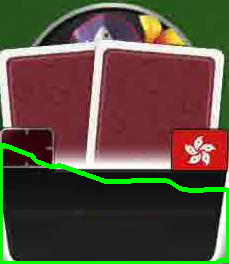

In [488]:
black_contour(save_dir+cut[25], 220)